<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [3]:
import sys
import tensorflow as tf
import tensorflow_addons as tfa
import tensorflow_datasets as tfds
from zipfile import ZipFile
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import bfseg.models.fast_scnn
import bfseg.data.hive.office_rumlang_validation_labeled
import bfseg.data.hive.bfseg_validation_labeled
from bfseg.utils.utils import load_gdrive_file
#from bfseg.settings import TMPDIR
TMPDIR = "/home/matthias/data/rss_2021_data/tmp/"
MASKPATH = "/home/matthias/data/rss_2021_data/mask.png"

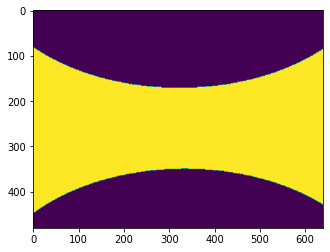

In [4]:
# Load mask
mask = plt.imread(MASKPATH)
ax = plt.subplot()
ax.imshow(mask)
mask_filtered = np.nonzero(mask)
test = mask[mask_filtered]

In [5]:
# Settings:
val_ds_office_gt = tfds.load('office_rumlang_validation_labeled', split='OFFICE')

In [6]:
nyu_depth_ds = tfds.load("NyuDepthV2LabeledDepth", split="full[:1%]")

# Combined Labels

## Office 3 Combined 2050 Cam2

In [7]:
directory = '/home/matthias/data/rss_2021_data/xavier_models/office3_combined2050_dyn_cam2_finetuning_1'

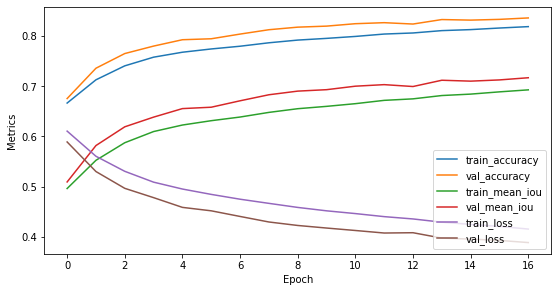

In [8]:
# Graph
log_file = os.path.join(directory, 'metrics.json')
with open(log_file) as f:
    data = json.load(f)
figure1 = plt.figure(figsize=(20,10))
ax = plt.subplot(2,2,1) 
ax.set_xlabel("Epoch")
ax.set_ylabel("Metrics")
for metric in ['train_accuracy', 'val_accuracy', 'train_mean_iou', 'val_mean_iou', 'train_loss', 'val_loss']:
    epoch = data[metric]['steps']
    metric_values = data[metric]['values']
    line, = ax.plot(epoch, metric_values)
    line.set_label(metric)    
ax.legend(loc=4)

In [9]:
# Office GT Validation
model0 = tf.keras.models.load_model(os.path.join(directory, 'model_epoch_6.h5'))

miou = tf.keras.metrics.MeanIoU(num_classes=2)
for batch in val_ds_office_gt.batch(1):
    a = tf.image.convert_image_dtype(batch['image'], tf.float32)
    b = model0(a)
    pred = tf.argmax(b[1], axis=-1)
    miou.update_state(batch['label'], pred, mask)
print("With mask: {}".format(miou.result()))
miou = tf.keras.metrics.MeanIoU(num_classes=2)
for batch in val_ds_office_gt.batch(1):
    a = tf.image.convert_image_dtype(batch['image'], tf.float32)
    b = model0(a)
    pred = tf.argmax(b[1], axis=-1)
    miou.update_state(batch['label'], pred)
print("Without mask: {}".format(miou.result()))

With mask: 0.5270905494689941
Without mask: 0.5491838455200195


# Dense Labels

## Office 3 Dense 20 Cam2

In [10]:
directory = '/home/matthias/data/rss_2021_data/xavier_models/office3_dense20_dyn_cam2_finetuning_1'

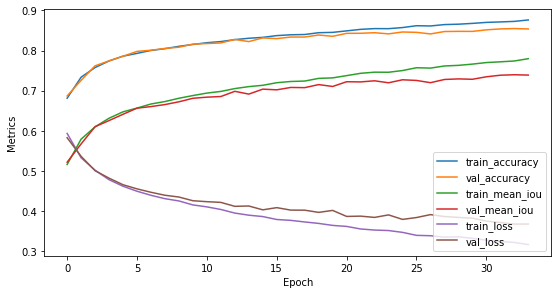

In [11]:
# Graph
log_file = os.path.join(directory, 'metrics.json')
with open(log_file) as f:
    data = json.load(f)
figure1 = plt.figure(figsize=(20,10))
ax = plt.subplot(2,2,1) 
ax.set_xlabel("Epoch")
ax.set_ylabel("Metrics")
for metric in ['train_accuracy', 'val_accuracy', 'train_mean_iou', 'val_mean_iou', 'train_loss', 'val_loss']:
    epoch = data[metric]['steps']
    metric_values = data[metric]['values']
    line, = ax.plot(epoch, metric_values)
    line.set_label(metric)    
ax.legend(loc=4)

In [12]:
# Office GT Validation
model0 = tf.keras.models.load_model(os.path.join(directory, 'model_epoch_5.h5'))

miou = tf.keras.metrics.MeanIoU(num_classes=2)
for batch in val_ds_office_gt.batch(1):
    a = tf.image.convert_image_dtype(batch['image'], tf.float32)
    b = model0(a)
    pred = tf.argmax(b[1], axis=-1)
    miou.update_state(batch['label'], pred, mask)
print("With mask: {}".format(miou.result()))
miou = tf.keras.metrics.MeanIoU(num_classes=2)
for batch in val_ds_office_gt.batch(1):
    a = tf.image.convert_image_dtype(batch['image'], tf.float32)
    b = model0(a)
    pred = tf.argmax(b[1], axis=-1)
    miou.update_state(batch['label'], pred)
print("Without mask: {}".format(miou.result()))

With mask: 0.5054502487182617
Without mask: 0.5357321500778198


## Office 3 Dense Depth 20 Cam2 

In [25]:
directory = '/home/matthias/data/rss_2021_data/xavier_models/nyu_depth_pretraining_9'

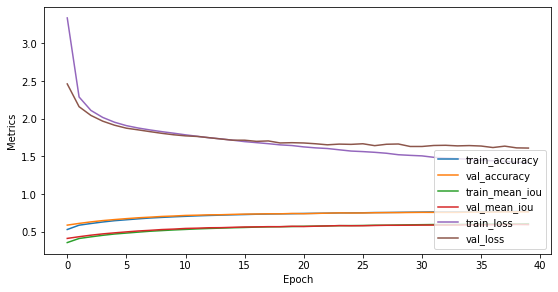

In [26]:
# Graph
log_file = os.path.join(directory, 'metrics.json')
with open(log_file) as f:
    data = json.load(f)
figure1 = plt.figure(figsize=(20,10))
ax = plt.subplot(2,2,1) 
ax.set_xlabel("Epoch")
ax.set_ylabel("Metrics")
for metric in ['train_accuracy', 'val_accuracy', 'train_mean_iou', 'val_mean_iou', 'train_loss', 'val_loss']:
    epoch = data[metric]['steps']
    metric_values = data[metric]['values']
    line, = ax.plot(epoch, metric_values)
    line.set_label(metric)    
ax.legend(loc=4)

With mask: 0.49730777740478516
Without mask: 0.5160036683082581


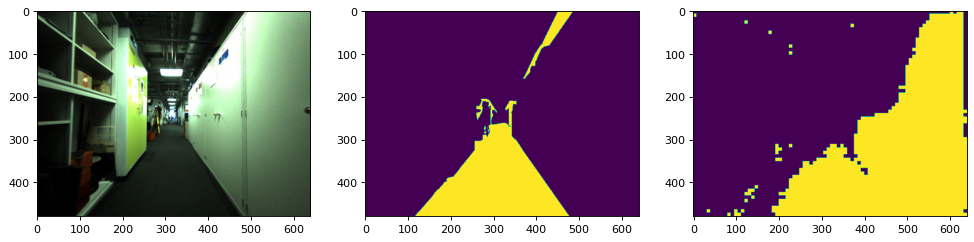

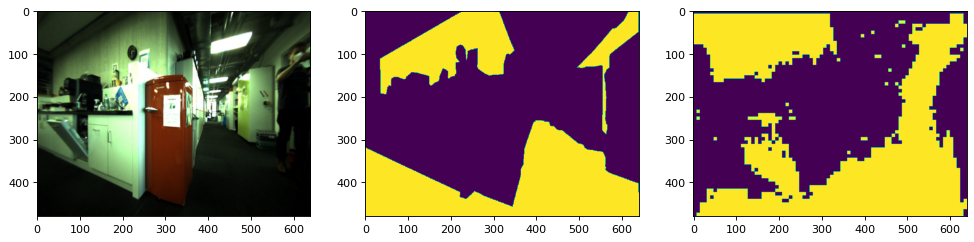

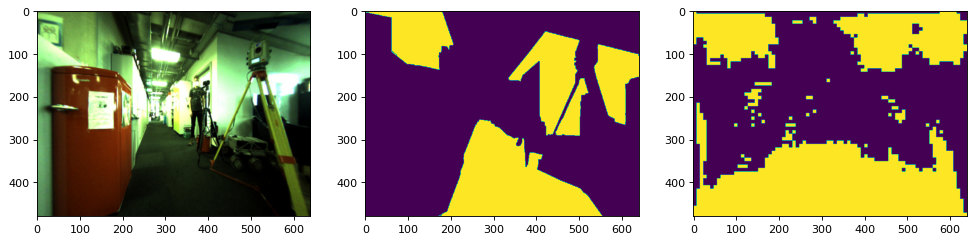

In [35]:
# Office GT Validation
model0 = tf.keras.models.load_model(os.path.join(directory, 'model_epoch_20.h5'))

miou = tf.keras.metrics.MeanIoU(num_classes=2)
for batch in val_ds_office_gt.batch(1):
    a = tf.image.convert_image_dtype(batch['image'], tf.float32)
    b = model0(a)[1][0]
    pred = tf.argmax(b, axis=-1)
    miou.update_state(batch['label'], pred, mask)
print("With mask: {}".format(miou.result()))
miou = tf.keras.metrics.MeanIoU(num_classes=2)
for batch in val_ds_office_gt.batch(1):
    a = tf.image.convert_image_dtype(batch['image'], tf.float32)
    b = model0(a)[1][0]
    pred = tf.argmax(b, axis=-1)
    miou.update_state(batch['label'], pred)
print("Without mask: {}".format(miou.result()))

for entry in val_ds_office_gt.take(3):
    figure = plt.figure(figsize=(15, 5), dpi=80)
    plt.subplot(1,3,1)
    plt.imshow(entry['image'])
    plt.subplot(1,3,2)
    plt.imshow(entry['label'])
    a = tf.image.convert_image_dtype(tf.expand_dims(entry['image'],axis=0), tf.float32)
    b = model0(a)[1][0]
    pred = tf.argmax(b, axis=-1)
    plt.subplot(1,3,3)
    plt.imshow(pred[0,:,:])

# Other validation Strategies

With custom mask: 0.6080186367034912


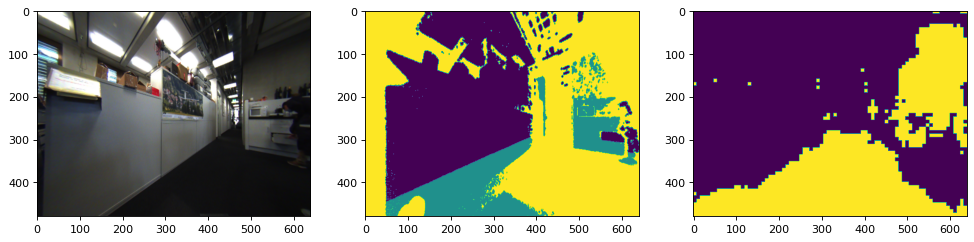

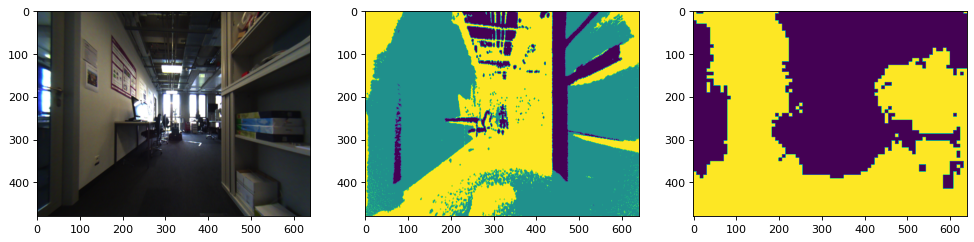

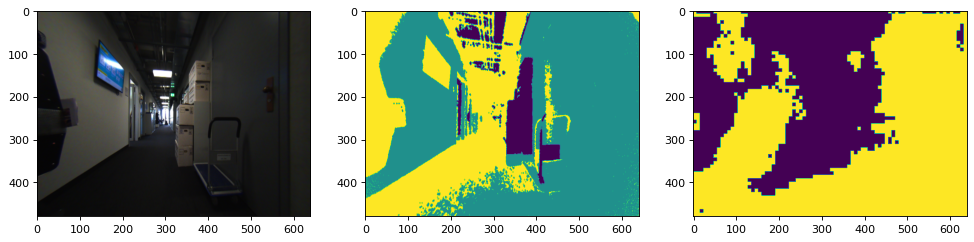

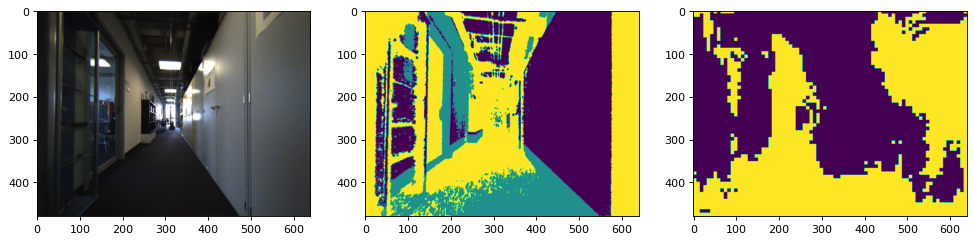

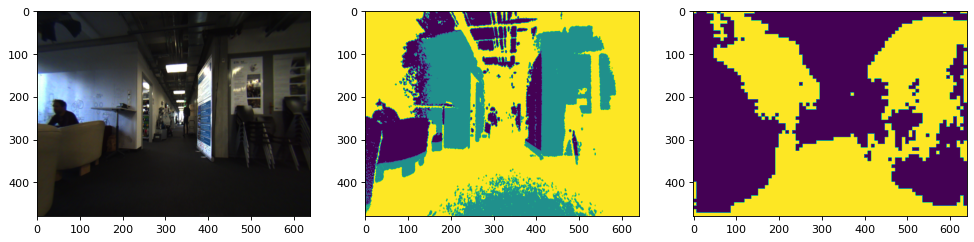

In [42]:
# Office 12 Validation

# mIoU
miou = tf.keras.metrics.MeanIoU(num_classes=2)
count = 0
max_count = 20 # Number of Validation images
for batch in val_ds_office_12.batch(1):
    resized_images = tf.image.resize(batch['image'], [480,640])
    resized_labels = tf.image.resize(batch['label'], [480,640])

    zero_mask =np.full((1,480,640,1), 0.0).astype("float32")
    zero_mask =tf.constant(zero_mask)
    one_mask =np.full((1,480,640,1), 1.0).astype("float32")
    one_mask =tf.constant(one_mask)
    
    final_mask=tf.where(resized_labels == 2, zero_mask, one_mask)
    final_mask = final_mask.numpy()[0,:,:,0]
    
    resized_labels = tf.cast(tf.where(resized_labels == 2, zero_mask, resized_labels), tf.uint8)

    a = tf.image.convert_image_dtype(resized_images, tf.float32)
    b = model1(a)
    pred = tf.argmax(b[1], axis=-1)

    miou.update_state(resized_labels, pred, final_mask)
    count += 1
    if count == max_count:
        break
print("With custom mask: {}".format(miou.result()))

# Visualization
for entry in val_ds_office_12.take(5):
    image = entry['image']/255
    image = tf.image.resize(image, [480,640])
    label = entry['label']
    label = tf.image.resize(label, [480,640])
    figure = plt.figure(figsize=(15, 5), dpi=80)
    plt.subplot(1,3,1)
    plt.imshow(image)
    plt.subplot(1,3,2)
    plt.imshow(label)
    a = tf.image.convert_image_dtype(tf.expand_dims(image,axis=0), tf.float32)
    b = model1(a)
    pred = tf.argmax(b[1], axis=-1)
    plt.subplot(1,3,3)
    plt.imshow(pred[0,:,:])